<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_13_01_%EA%B5%AC%EA%B0%84%EC%B6%94%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 모평균의 신뢰구간 추정
샘플 수 < 30, t-통계량 이용

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25, 101, size = 500),columns = ["점수"])

In [ ]:
# 데이터 확인

scores = np.array(math_score.점수)
scores[:5]

array([33, 49, 92, 73, 35])

In [ ]:
# 20개 샘플 추출(복원추출)

sample = np.random.choice(scores, 20)

In [ ]:
# 20개의 표본 100번 추출

n = 20
nSample = 100

sample_mean = np.array([np.random.choice(scores,n,i).mean() for i in range(nSample)])

In [ ]:
from scipy.stats import t

t_95 = t.ppf(1 - (1 - 0.95) / 2, df = 19)

t_95

2.093024054408263

In [ ]:
# 20개의 표본 100개 추출
# 95% 신뢰구간 추정: t통계량 2.093

sMean = sample_mean.mean()
sStd = sample_mean.std()

Low_c = sMean - t_95 * (sStd / math.sqrt(n))
Upper_c = sMean + t_95 * (sStd / math.sqrt(n))

print(Low_c)
print(Upper_c)

# 모평균의 95% 신뢰구간은 약 59.4 ~ 64.0점이다(추정값)

print("신뢰구간 :", round(Low_c,3), "~",  round(Upper_c,3))

59.36743544301041
64.03456455698958
신뢰구간 : 59.367 ~ 64.035


### 2. 모평균의 신뢰구간 추정

샘플 수 >= 30, Z-통계량

In [ ]:
# 30개의 표본 1개 추출
# 95% 신뢰구간 추정: z통계량 1.96

z_n = 30
sample1 = np.random.choice(scores, z_n)
z_sMean = sample1.mean()
z_sStd = sample1.std()

print('모평균 : ', scores.mean())
print('표본평균 : ', z_sMean)
print('모편차 : ', scores.std())
print('표본편차 : ', z_sStd)

모평균 :  61.58
표본평균 :  62.3
모편차 :  21.491849617936563
표본편차 :  21.75492281454169


In [ ]:
# 임계값
z_95 = stats.norm.ppf(1 - (1 - 0.95) / 2) #양측검정
# stats.norm.ppf(0.95) #단측검정

print(z_95)

1.959963984540054


In [ ]:
L_value_1 = round(z_sMean - z_95 * (scores.std() / math.sqrt(z_n)),2)
U_value_1 = round(z_sMean + z_95 * (scores.std() / math.sqrt(z_n)),2)
print(L_value_1)
print(U_value_1)

print("신뢰구간 : ", L_value_1, "~", U_value_1)

54.61
69.99
신뢰구간 :  54.61 ~ 69.99


### 3. 예제
* 어느 고등학교 남학생 49명의 제자리에서 멀리뛰기 기록은 평균이 205cm, 표준편차가 5cm이었다. 이 학교 남학생들의 제자리 멀리뛰기 기록에 대한 모평균 m의 95% 신뢰구간을 구하라

In [ ]:
# 모평균, 모표준편차, 표본 수

mStd = 5
mMean = 205
n = 49

# z통계량 : 1.96

z_95_1 = stats.norm.ppf(1 - (1 - 0.95) / 2) # 신뢰구간

# 신뢰구간 계산

L_value = round(mMean - z_95_1 * (mStd / math.sqrt(n)), 2)
U_value = round(mMean + z_95_1 * (mStd / math.sqrt(n)), 2)

print("신뢰구간 : ", L_value, "~", U_value)
print("신뢰구간범위 : ", round(U_value - L_value, 3)) 

print("{} < {} < {}".format(L_value, mMean, U_value))

신뢰구간 :  203.6 ~ 206.4
신뢰구간범위 :  2.8
203.6 < 205 < 206.4


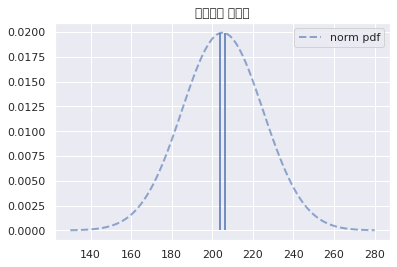

In [ ]:
# 시각화

standard_norm = stats.norm(205, 5)

x = np.linspace(130, 280, 100)

plt.vlines(L_value, 0 ,standard_norm.pdf(L_value), color = "b")
plt.vlines(U_value, 0 ,standard_norm.pdf(L_value), color = "b")
plt.plot(x, standard_norm.pdf(x), "b--", lw = 2, alpha = 0.6, label = 'norm pdf')

plt.title('신뢰구간 시각화')
plt.legend()
plt.show()